In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset=pd.read_csv('C:/Users/DELL/Desktop/project- python/wind.csv')

In [3]:
dataset

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [4]:
dataset.head(5)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [5]:
dataset.isnull().any()

Date/Time                        False
LV ActivePower (kW)              False
Wind Speed (m/s)                 False
Theoretical_Power_Curve (KWh)    False
Wind Direction (°)               False
dtype: bool

In [6]:
dataset.rename(columns = {'LV ActivePower (kW)':'ActivePower(kW)',
                       "Wind Speed (m/s)":"WindSpeed(m/s)",
                       "Wind Direction (°)":"WindDirection","Theoretical_Power_Curve (KWh)":"TheoreticalPowerCurve(KWh)"},
            inplace = True)
dataset.head()

,Date/Time,ActivePower(kW),WindSpeed(m/s),TheoreticalPowerCurve(KWh),WindDirection
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [7]:
x = dataset.iloc[:,2:5].values
y = dataset.iloc[:,1].values

In [8]:
x

array([[   5.31133604,  416.32890782,  259.99490356],
       [   5.67216682,  519.91751106,  268.64111328],
       [   5.2160368 ,  390.90001581,  272.56478882],
       ...,
       [   8.43535805, 1788.28475526,   84.74250031],
       [   9.42136574, 2418.38250336,   84.2979126 ],
       [   9.97933197, 2779.18409628,   82.27462006]])

In [9]:
y

array([ 380.04779053,  453.76919556,  306.37658691, ..., 2201.10693359,
       2515.6940918 , 2820.46606445])

In [10]:
dataset['Date/Time'] = pd.to_datetime(dataset['Date/Time'],format='%d %m %Y %H:%M')
dataset['year'] = dataset['Date/Time'].dt.year 
dataset['month'] = dataset['Date/Time'].dt.month 
dataset['day'] = dataset['Date/Time'].dt.day

In [11]:
dataset['Hour'] = dataset['Date/Time'].dt.hour 
dataset['minute'] = dataset['Date/Time'].dt.minute 
dataset.head()

,Date/Time,ActivePower(kW),WindSpeed(m/s),TheoreticalPowerCurve(KWh),WindDirection,year,month,day,Hour,minute
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40


In [12]:
def mean_direction(x):
    list=[]
    i=15
    while i<=375:
        list.append(i)
        i+=30
        
    for i in list:
        if x < i:
            x=i-15
            if x==360:
                return 0
            else:
                return x

In [13]:
dataset["meanDirection"]=dataset["WindDirection"].apply(mean_direction)
dataset.head(5)

,Date/Time,ActivePower(kW),WindSpeed(m/s),TheoreticalPowerCurve(KWh),WindDirection,year,month,day,Hour,minute,meanDirection
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0,270
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10,270
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20,270
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30,270
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40,270


In [14]:
directiondict = {0:"N", 30:"NNE", 60:"NEE", 90:"E", 120:"SEE", 150:"SSE", 180:"S", 210:"SSW", 240:"SWW", 270:"W", 300:"NWW", 330:"NNW"}

def wind_direction(x):
  for x in directiondict:
    return directiondict[x]


In [15]:
dataset['windDirection'] = dataset['meanDirection'].apply(wind_direction)

In [16]:
dataset.head(5)

,Date/Time,ActivePower(kW),WindSpeed(m/s),TheoreticalPowerCurve(KWh),WindDirection,year,month,day,Hour,minute,meanDirection,windDirection
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0,270,N
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10,270,N
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20,270,N
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30,270,N
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40,270,N


In [17]:
x = dataset[[ 'WindDirection', 'month', 'day', 'Hour', 'meanDirection']]

In [18]:
x

,WindDirection,month,day,Hour,meanDirection
0,259.994904,1,1,0,270
1,268.641113,1,1,0,270
2,272.564789,1,1,0,270
3,271.258087,1,1,0,270
4,265.674286,1,1,0,270
...,...,...,...,...,...
50525,80.502724,12,31,23,90
50526,84.062599,12,31,23,90
50527,84.742500,12,31,23,90
50528,84.297913,12,31,23,90


In [19]:
y = dataset['ActivePower(kW)']

In [20]:
!pip install plotly

In [21]:
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.pyplot import figure
import seaborn as sns
import joblib
 
import warnings
warnings.filterwarnings("ignore")

In [22]:
dataset.shape

(50530, 12)

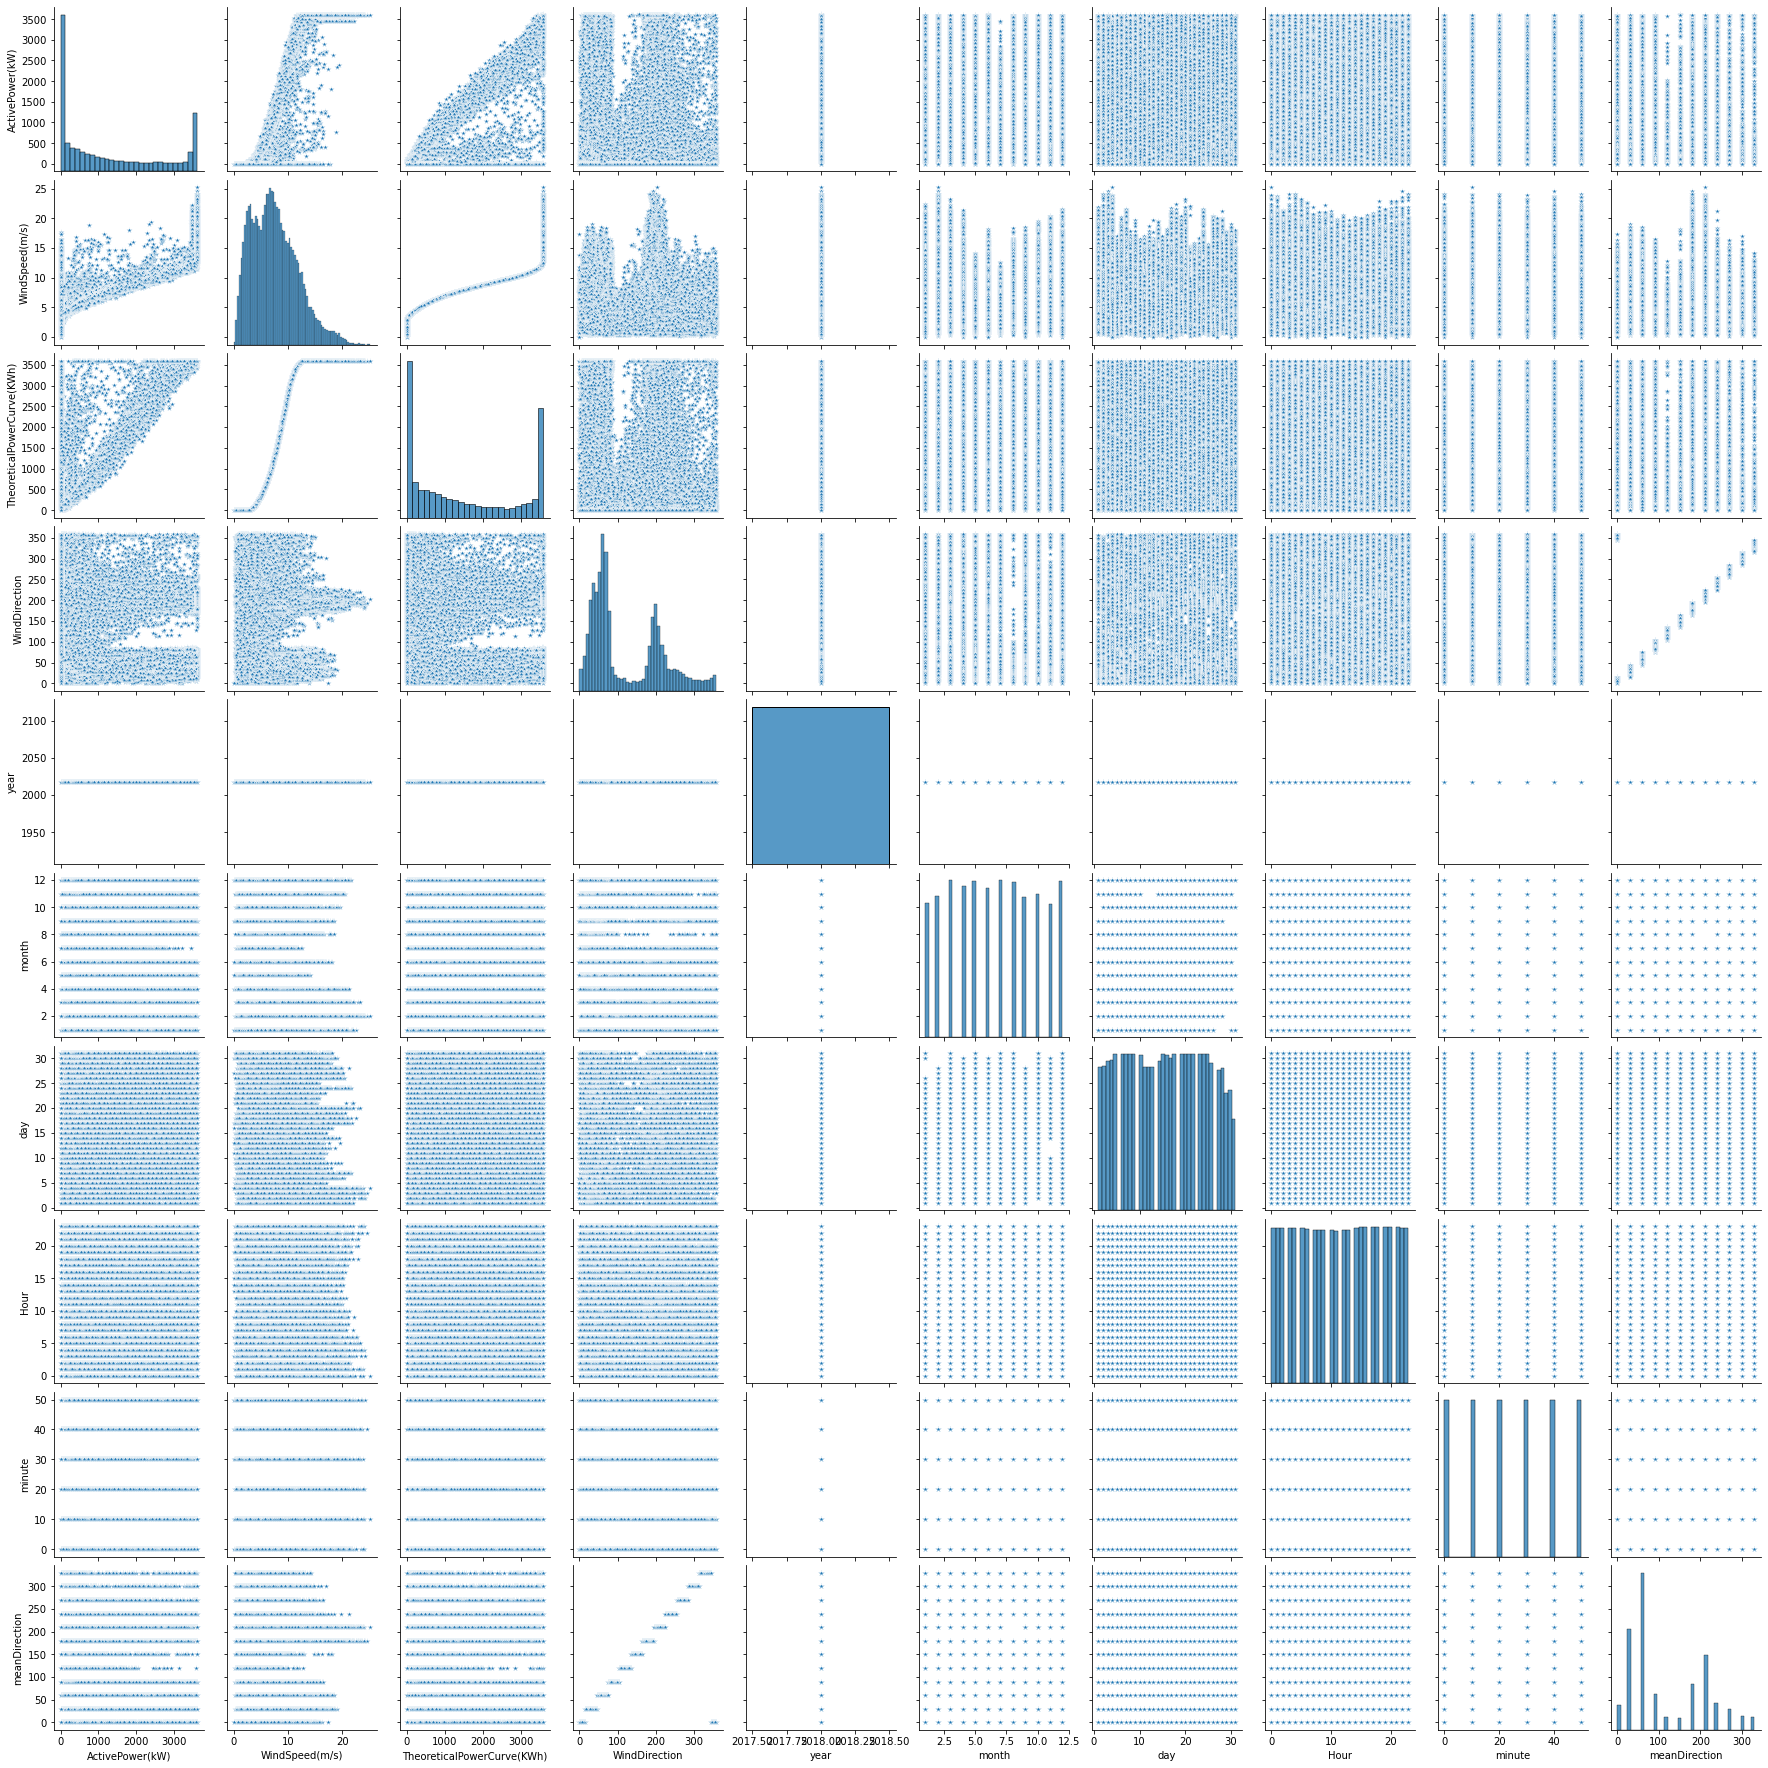

In [23]:
import seaborn as sns
sns.pairplot(dataset,markers='*')

<AxesSubplot:>

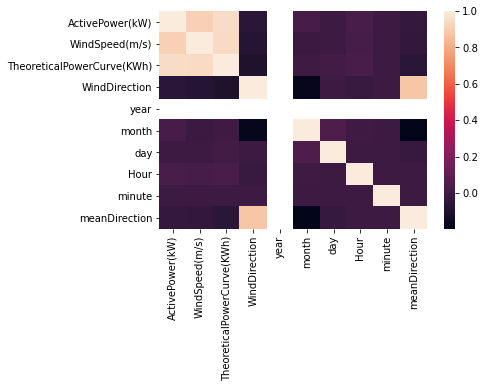

In [24]:
sns.heatmap(dataset.corr())

In [25]:
from datetime import datetime
datetime.strptime("2012-may-31 19:00", "%Y-%b-%d %H:%M")
datetime.strptime("01 10 2018 04:00","%d %m %Y %H:%M")

datetime.datetime(2018, 10, 1, 4, 0)

<AxesSubplot:>

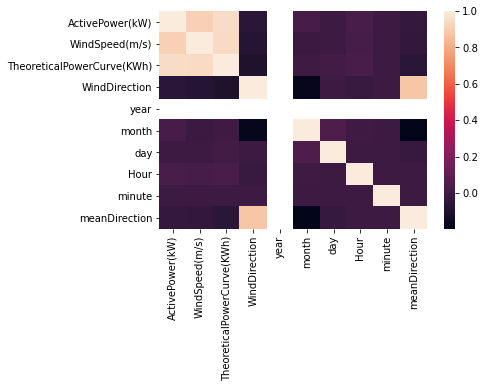

In [26]:
sns.heatmap(dataset.corr())

In [27]:
dataset.corr()

,ActivePower(kW),WindSpeed(m/s),TheoreticalPowerCurve(KWh),WindDirection,year,month,day,Hour,minute,meanDirection
ActivePower(kW),1.000000,0.912774,0.949918,-0.062702,NaN,0.031010,-0.007530,0.036355,-0.000028,-0.028036
WindSpeed(m/s),0.912774,1.000000,0.944209,-0.077188,NaN,-0.013349,-0.000058,0.024754,0.000166,-0.036713
TheoreticalPowerCurve(KWh),0.949918,0.944209,1.000000,-0.099076,NaN,0.004455,0.017096,0.034636,-0.000020,-0.064206
WindDirection,-0.062702,-0.077188,-0.099076,1.000000,NaN,-0.180712,-0.008287,-0.015355,-0.001821,0.880726
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.031010,-0.013349,0.004455,-0.180712,NaN,1.000000,0.049584,0.001510,-0.000114,-0.195913
day,-0.007530,-0.000058,0.017096,-0.008287,NaN,0.049584,1.000000,-0.001882,-0.000331,-0.019766
Hour,0.036355,0.024754,0.034636,-0.015355,NaN,0.001510,-0.001882,1.000000,0.000062,-0.005810
minute,-0.000028,0.000166,-0.000020,-0.001821,NaN,-0.000114,-0.000331,0.000062,1.000000,-0.001051
meanDirection,-0.028036,-0.036713,-0.064206,0.880726,NaN,-0.195913,-0.019766,-0.005810,-0.001051,1.000000


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date/Time                   50530 non-null  datetime64[ns]
 1   ActivePower(kW)             50530 non-null  float64       
 2   WindSpeed(m/s)              50530 non-null  float64       
 3   TheoreticalPowerCurve(KWh)  50530 non-null  float64       
 4   WindDirection               50530 non-null  float64       
 5   year                        50530 non-null  int64         
 6   month                       50530 non-null  int64         
 7   day                         50530 non-null  int64         
 8   Hour                        50530 non-null  int64         
 9   minute                      50530 non-null  int64         
 10  meanDirection               50530 non-null  int64         
 11  windDirection               50530 non-null  object    

In [29]:
y


0         380.047791
1         453.769196
2         306.376587
3         419.645905
4         380.650696
            ...     
50525    2963.980957
50526    1684.353027
50527    2201.106934
50528    2515.694092
50529    2820.466064
Name: ActivePower(kW), Length: 50530, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error , r2_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler ()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [32]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [33]:
ypred = linear.predict(x_test)

In [34]:
ypred

array([1417.00315777, 1320.50287179, 1253.10915951, ..., 1335.99815529,
       1424.08012883, 1297.24835778])

In [35]:
y_test

47469     576.656982
4456     1619.301025
49305    1876.581055
48151    3367.349121
33422     151.391693
            ...     
45495    3601.443115
44230     909.782471
11003     667.257080
30004    3473.522949
30782    2343.063965
Name: ActivePower(kW), Length: 10106, dtype: float64

In [36]:
from sklearn.metrics import r2_score
accuracy = r2_score(ypred,y_test)

In [37]:
accuracy

-90.43516818323144

In [38]:
import requests
apikey = "43ce69715e2133b2300e0f8f7289befd"
resp = requests.get("http://api.openweathermap.org/data/2.5/weather?q=London&appid="+apikey)
print(resp.json())
resp=resp.json()
temp = resp["main"]["temp"]
humid = resp["main"]["humidity"]
pressure = resp["main"]["pressure"]
humid = resp["wind"]["speed"]
print(temp,humid,pressure,humid)

{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 291.13, 'feels_like': 290.97, 'temp_min': 289.35, 'temp_max': 292.49, 'pressure': 1010, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 0.45, 'deg': 283, 'gust': 2.24}, 'clouds': {'all': 100}, 'dt': 1627371487, 'sys': {'type': 2, 'id': 2019646, 'country': 'GB', 'sunrise': 1627359414, 'sunset': 1627415813}, 'timezone': 3600, 'id': 2643743, 'name': 'London', 'cod': 200}
291.13 0.45 1010 0.45


In [39]:
pressure

1010

In [40]:
humid

0.45

In [41]:
lasso = Lasso(alpha = 0.01)
model = lasso.fit(x_train, y_train) 
pred_train_lasso= lasso.predict(x_train)

print("Training RMSE and R2 score:")
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= lasso.predict(x_test)

print("Testing RMSE and R2 score:")
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

Training RMSE and R2 score:
1304.5961490626557
0.009757206626671788
Testing RMSE and R2 score:
1314.0762265090698
0.006207167203019726


In [42]:
print(*model.predict([[270,1,1,23,5.5]]))


-57271.79977669313


In [43]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [44]:
import pickle
with open("winds.pkl","wb") as f:
    pickle.dump(linear,f)

In [45]:
lr_model = pickle.load(open("winds.pkl","rb"))

In [46]:
joblib.dump(model,'lasso.pk1')

['lasso.pk1']